In [48]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob 
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

sns.set_theme(style="white")
sns.set_context("talk")


data_dir = "/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/benchfam/"




 # 1. PREP SCORES
def get_scores(score_files): 
    def parse_score(score_file): 
        return(pd.read_csv(score_file,sep = ";", header = None).drop(4, axis = 1))

    scores = pd.concat(list(map(parse_score, score_files)))
    scores = scores.iloc[:,0:4]
    scores.columns = ['name', 'sp', 'tc', 'column']
    return(scores)   

# load irmsd scores
def get_irmsd(score_files): 
    def parse_score(score_file):
        df = pd.read_csv(score_file, sep = ":", skiprows=1, header = None )
        df.columns = ["metric", "val"]
        df.metric = df.metric.str.split("\s+", expand = True)[2]
        df.val = df.val.str.split("\s+",expand = True)[1]
        df.index = df.metric
        df = df.drop("metric", axis = 1)
        df = df.T.reset_index().drop("index", axis = 1)
        name = os.path.basename(score_file).replace(".total_irmsd", "")
        df["name"] = name
        return(df)
    scores = pd.concat(list(map(parse_score, score_files)))
    return(scores)


# get normal scores
def get_refs(score_files): 
    def parse_score(score_file): 
        return(pd.read_csv(score_file,sep = ";", header = None).drop(4, axis = 1))

    scores = pd.concat(list(map(parse_score, score_files)))
    scores = scores.iloc[:,0:4]
    scores.columns = ['name', 'sp', 'tc', 'column']
    return(scores)


def get_scores(pattern, ref = False): 
    if ref: 
        pattern = "*-ref"+pattern
    else:
        pattern = "*[!ref]"+pattern 
    print(pattern)
    df1 = get_irmsd((glob.glob(os.path.join(data_dir, "evaluation/irmsd/"+pattern+"irmsd"))))
    df2 = get_refs((glob.glob(os.path.join(data_dir, "evaluation/score/"+pattern))))
    return(df1.merge(df2, on = "name"))


def plot_scatter_perc(df1,df2,xlabel,ylabel,
                      palette = sns.dark_palette("#3399FF", reverse = True, as_cmap=True),
                      log = True, 
                      title = "regressive on homfam", hue_var = "sim", metric = "tc", size_fig = 1): 
    f, ax = plt.subplots(figsize=(8*size_fig,6.4*size_fig ))
    
    # Prep df 
    df = df1.merge(df2, on = ["family", hue_var])
    
    df["sim"] = 1
    hue = df[hue_var]
    hue = 1
    # colorbar 
    norm = mpl.colors.Normalize( vmin=0, vmax=100)
    sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
    sm.set_array([])
    
    # Color bar 
    cbar =ax.figure.colorbar(sm, ticks=[0,50,100], format=mpl.ticker.ScalarFormatter())
    cbar.ax.set_yticklabels(["0", "50", "100"]) 
    cbar.ax.set_ylabel('avg % similarity', rotation=270, labelpad = 20, fontsize = "small")
    
    metric_x = metric+"_x"
    metric_y = metric+"_y"
    # Plot 
    ax = sns.scatterplot(data = df, x = metric_x,
                    y = metric_y,
                    hue = hue_var,
                    s = 100,
                    palette = palette)

    # % above the line
    perc_y_better_than_x = (len(list(filter(lambda ele: ele == True, list(df[metric_x] <= df[metric_y])))) / len(list(df[metric_x]  >= df[metric_y] ))) * 100
    
    # Diagonal line
    ax.axline((1, 1), slope=1, ls="--", c=".2", lw = 0.8)
    
    ax.set(xlim = (0,100), ylim = (0,100))
    ax.get_legend().remove()
    
    # Axis labels
    ax.set(xlabel=xlabel,
           ylabel=ylabel,
           title = title + "\n metric: "+metric+"\n (n = "+str(len(df[metric_x] ))+") \n\n % y >= x  "+str(round(perc_y_better_than_x,1))+" \n")

    
    
def plot_scatter_perc(df1,df2,xlabel,ylabel,
                      palette = sns.dark_palette("#3399FF", reverse = True, as_cmap=True),
                      log = True, 
                      title = "regressive on homfam", hue_var = "sim", metric = "tc", size_fig = 1): 
    f, ax = plt.subplots(figsize=(7*size_fig,6.4*size_fig ))
    
    # Prep df 
    df = df1.merge(df2, on = ["family", hue_var])
    
    hue = df[hue_var]
    # colorbar 
    norm = mpl.colors.Normalize( vmin=0, vmax=100)
    sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
    sm.set_array([])
    
    # Color bar 
    cbar =ax.figure.colorbar(sm, ticks=[0,50,100], format=mpl.ticker.ScalarFormatter())
    cbar.ax.set_yticklabels(["0", "50", "100"]) 
    cbar.ax.set_ylabel('avg % similarity', rotation=270, labelpad = 20, fontsize = "small")

    metric_x = metric+"_x"
    metric_y = metric+"_y"
    # Plot 
    ax = sns.scatterplot(data = df, x = metric_x,
                    y = metric_y, s = 20, hue = hue_var,
                    palette = palette)

    # % above the line
    perc_y_better_than_x = (len(list(filter(lambda ele: ele == True, list(df[metric_x] <= df[metric_y])))) / len(list(df[metric_x]  >= df[metric_y] ))) * 100
    
    # Diagonal line
    ax.axline((1, 1), slope=1, ls="--", c=".2", lw = 0.8)
    ax.get_legend().remove()
  
    ax.set(xlim = (0,100), ylim = (0,100))
    
    # Axis labels
    ax.set(xlabel=xlabel,
           ylabel=ylabel,
           title = title + "\n metric: "+metric+"\n (n = "+str(len(df[metric_x] ))+") \n\n % y >= x  "+str(round(perc_y_better_than_x,1))+" \n")



In [12]:
families = pd.read_csv('/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/refs/02_summary_benchfam_refs.csv')

In [15]:
foldseek_seq_scores = get_scores(glob.glob(os.path.join(data_dir, "evaluation/score/*fsproba*")))
foldseek_seq_scores[["family", "align_method","bucket_size", "library_method", "tree_method"]] = foldseek_seq_scores.name.str.split(".", expand = True)
foldseek_seq_scores = foldseek_seq_scores.merge(families, on = ["family"])

In [57]:
foldseek_seq_scores = get_scores("*fsproba*")
foldseek_seq_scores[["family", "align_method","bucket_size", "library_method", "tree_method"]] = foldseek_seq_scores.name.str.split(".", expand = True)
foldseek_seq_scores = foldseek_seq_scores.merge(families, on = ["family"])
foldseek_seq_scores["NiRMSD"] = foldseek_seq_scores["NiRMSD"].astype(float)

*[!ref]*fsproba*


In [58]:
proba_scores = get_scores(glob.glob(os.path.join(data_dir, "evaluation/score/*probaonly*")))
proba_scores[["family", "align_method","bucket_size", "library_method", "tree_method"]] = proba_scores.name.str.split(".", expand = True)
proba_scores = proba_scores.merge(families, on = ["family"])


TypeError: can only concatenate str (not "list") to str

In [59]:
proba_scores = get_scores("*probaonly*")
proba_scores[["family", "align_method","bucket_size", "library_method", "tree_method"]] = proba_scores.name.str.split(".", expand = True)
proba_scores = proba_scores.merge(families, on = ["family"])
proba_scores["NiRMSD"] = proba_scores["NiRMSD"].astype(float)

*[!ref]*probaonly*


In [17]:
fs_scores = get_scores(glob.glob(os.path.join(data_dir, "evaluation/score/*fsonly*")))
fs_scores[["family", "align_method","bucket_size", "library_method", "tree_method"]] = fs_scores.name.str.split(".", expand = True)
fs_scores = fs_scores.merge(families, on = ["family"])

In [60]:
fs_scores = get_scores("*fsonly*")
fs_scores[["family", "align_method","bucket_size", "library_method", "tree_method"]] = fs_scores.name.str.split(".", expand = True)
fs_scores = fs_scores.merge(families, on = ["family"])
fs_scores["NiRMSD"] = fs_scores["NiRMSD"].astype(float)

*[!ref]*fsonly*


In [61]:
scores = pd.concat([foldseek_seq_scores,proba_scores,fs_scores])
scores.head(3)

,EVALUATED,APDB,iRMSD,NiRMSD,name,sp,tc,column,family,align_method,bucket_size,library_method,tree_method,benchmarking_dataset,sim,mean,median,max,n_sequences,domain
0,87.04,74.78,0.75,0.87,PF01026-ref.foldeek_regressive.100.fsproba.MBED,93.6,68.1,74.4,PF01026-ref,foldeek_regressive,100,fsproba,MBED,benchfam,30.49,260.3,254.0,293,10,mono
1,74.21,70.24,0.88,1.18,PF01193-ref.foldeek_regressive.100.fsproba.MBED,85.8,49.7,68.0,PF01193-ref,foldeek_regressive,100,fsproba,MBED,benchfam,32.76,225.2,235.0,273,10,mono
2,82.14,73.59,0.82,1.00,PF00644-ref.foldeek_regressive.100.fsproba.MBED,86.5,58.1,69.4,PF00644-ref,foldeek_regressive,100,fsproba,MBED,benchfam,34.36,200.0,206.0,213,11,mono


In [19]:
print(stats.spearmanr(proba_scores.sp, proba_scores.sim))
print(stats.spearmanr(fs_scores.sp, fs_scores.sim))
print(stats.spearmanr(foldseek_seq_scores.sp, foldseek_seq_scores.sim))

SpearmanrResult(correlation=0.5461799167996729, pvalue=1.364841579228846e-52)
SpearmanrResult(correlation=0.2470911172710717, pvalue=1.472712557136981e-09)
SpearmanrResult(correlation=0.5193271232636847, pvalue=2.2651922324857284e-41)


In [23]:
bins = [10,20,25,30,35,40,45,50]
scores['binned'] = pd.cut(scores['sim'], bins)

In [54]:
scores

,EVALUATED,APDB,iRMSD,NiRMSD,name,sp,tc,column,family,align_method,bucket_size,library_method,tree_method,benchmarking_dataset,sim,mean,median,max,n_sequences,domain
0,87.04,74.78,0.75,0.87,PF01026-ref.foldeek_regressive.100.fsproba.MBED,93.6,68.1,74.4,PF01026-ref,foldeek_regressive,100,fsproba,MBED,benchfam,30.49,260.300000,254.0,293,10,mono
1,74.21,70.24,0.88,1.18,PF01193-ref.foldeek_regressive.100.fsproba.MBED,85.8,49.7,68.0,PF01193-ref,foldeek_regressive,100,fsproba,MBED,benchfam,32.76,225.200000,235.0,273,10,mono
2,82.14,73.59,0.82,1.00,PF00644-ref.foldeek_regressive.100.fsproba.MBED,86.5,58.1,69.4,PF00644-ref,foldeek_regressive,100,fsproba,MBED,benchfam,34.36,200.000000,206.0,213,11,mono
3,86.64,63.26,1.00,1.15,PF11396-ref.foldeek_regressive.100.fsproba.MBED,81.8,37.8,42.5,PF11396-ref,foldeek_regressive,100,fsproba,MBED,benchfam,32.76,87.300000,85.0,95,10,multi
4,85.69,64.65,0.90,1.05,PF02254-ref.foldeek_regressive.100.fsproba.MBED,96.4,72.6,75.4,PF02254-ref,foldeek_regressive,100,fsproba,MBED,benchfam,24.45,116.666667,116.0,123,15,multi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,65.00,50.15,1.23,1.90,PF00848-ref.foldeek_regressive.100.fsonly.MBED,49.7,9.1,10.6,PF00848-ref,foldeek_regressive,100,fsonly,MBED,benchfam,38.33,263.818182,268.0,272,11,mono
530,79.65,83.69,0.59,0.74,PF00217-ref.foldeek_regressive.100.fsonly.MBED,76.1,2.8,2.1,PF00217-ref,foldeek_regressive,100,fsonly,MBED,benchfam,60.98,247.250000,248.0,249,12,mono
531,54.27,49.05,1.08,1.99,PF00536-ref.foldeek_regressive.100.fsonly.MBED,47.4,0.0,0.0,PF00536-ref,foldeek_regressive,100,fsonly,MBED,benchfam,26.08,64.058824,65.0,66,17,multi
532,84.25,67.77,0.87,1.03,PF00208-ref.foldeek_regressive.100.fsonly.MBED,80.5,19.3,21.2,PF00208-ref,foldeek_regressive,100,fsonly,MBED,benchfam,39.94,235.307692,234.0,247,13,mono


<AxesSubplot:xlabel='library_method', ylabel='sp'>

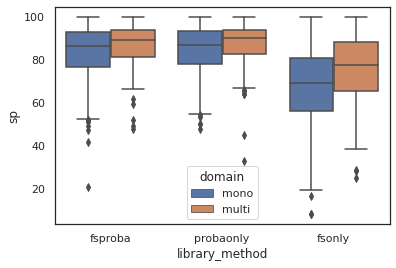

In [47]:
sns.boxplot(data = scores, x = "library_method", y = "sp", hue = "domain" )

<AxesSubplot:xlabel='domain', ylabel='sim'>

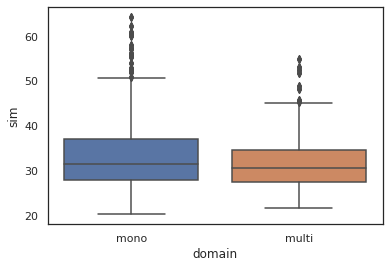

In [45]:
sns.boxplot(data = scores, x = "domain", y = "sim")

## Does FS + SEQ improve over SEQ?

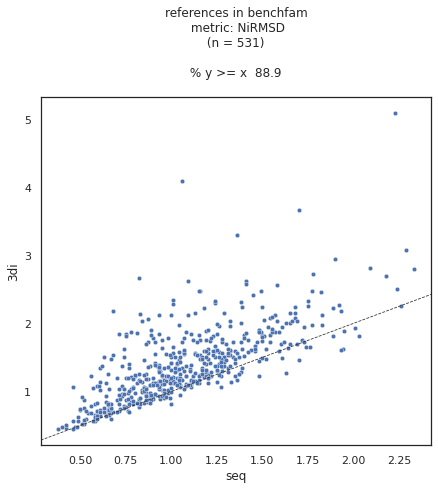

In [68]:
plot_scatter_perc(proba_scores, fs_scores, "seq", "3di",metric = "NiRMSD", title = "references in benchfam",  hue_var = "n_sequences")

In [65]:
def plot_scatter_perc(df1,df2,xlabel,ylabel,
                      palette = sns.dark_palette("#3399FF", reverse = True, as_cmap=True),
                      log = True, 
                      title = "regressive on homfam", hue_var = "sim", metric = "tc", size_fig = 1): 
    f, ax = plt.subplots(figsize=(7*size_fig,6.4*size_fig ))
    
    # Prep df 
    df = df1.merge(df2, on = ["family", hue_var])
    
    hue = df[hue_var]
   
    metric_x = metric+"_x"
    metric_y = metric+"_y"
    # Plot 
    ax = sns.scatterplot(data = df, x = metric_x,
                    y = metric_y, s = 20,
                    palette = palette)

    # % above the line
    perc_y_better_than_x = (len(list(filter(lambda ele: ele == True, list(df[metric_x] <= df[metric_y])))) / len(list(df[metric_x]  >= df[metric_y] ))) * 100
    
    # Diagonal line
    ax.axline((1, 1), slope=1, ls="--", c=".2", lw = 0.8)
  
    
    # Axis labels
    ax.set(xlabel=xlabel,
           ylabel=ylabel,
           title = title + "\n metric: "+metric+"\n (n = "+str(len(df[metric_x] ))+") \n\n % y >= x  "+str(round(perc_y_better_than_x,1))+" \n")


## Does FS + SEQ improve over FS? 

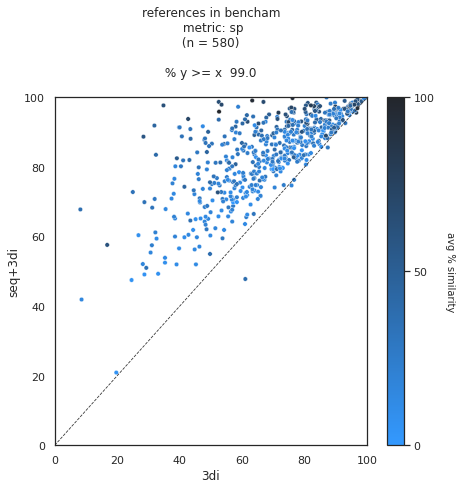

In [43]:
plot_scatter_perc(fs_scores, foldseek_seq_scores, "3di", "seq+3di",metric = "sp", title = "references in bencham")

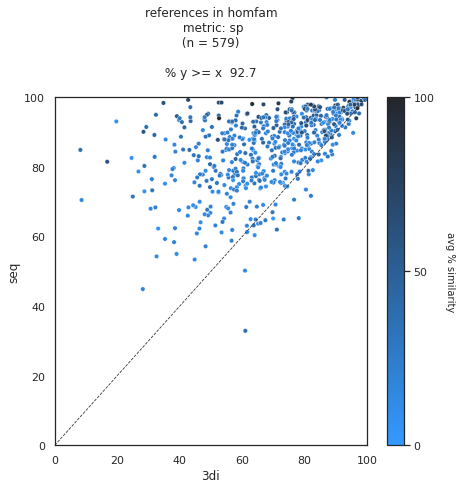

In [44]:
plot_scatter_perc(fs_scores, proba_scores, "3di", "seq",metric = "sp", title = "references in homfam")

In [7]:
foldseek_seq_scores

,name,sp,tc,column,family,align_method,bucket_size,library_method,tree_method,benchmarking_dataset,sim,mean,median,max,n_sequences
0,PF04261-ref.foldeek_regressive.100.fsproba.MBED,84.0,42.5,51.7,PF04261-ref,foldeek_regressive,100,fsproba,MBED,benchfam,7.20,324.000000,321.5,379,10
1,PF00035-ref.foldeek_regressive.100.fsproba.MBED,82.3,29.0,31.5,PF00035-ref,foldeek_regressive,100,fsproba,MBED,benchfam,15.90,66.666667,66.0,72,12
2,PF01670-ref.foldeek_regressive.100.fsproba.MBED,91.0,69.6,76.2,PF01670-ref,foldeek_regressive,100,fsproba,MBED,benchfam,16.06,213.416667,208.0,238,12
3,PF14602-ref.foldeek_regressive.100.fsproba.MBED,95.6,44.4,47.1,PF14602-ref,foldeek_regressive,100,fsproba,MBED,benchfam,25.40,34.812500,36.0,36,16
4,PF14670-ref.foldeek_regressive.100.fsproba.MBED,96.6,83.8,86.3,PF14670-ref,foldeek_regressive,100,fsproba,MBED,benchfam,26.02,37.000000,36.5,41,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,PF01433-ref.foldeek_regressive.100.fsproba.MBED,85.0,53.8,58.9,PF01433-ref,foldeek_regressive,100,fsproba,MBED,benchfam,6.51,379.230769,376.0,406,13
576,PF01588-ref.foldeek_regressive.100.fsproba.MBED,88.3,57.7,61.8,PF01588-ref,foldeek_regressive,100,fsproba,MBED,benchfam,17.06,96.714286,96.5,103,14
577,PF10415-ref.foldeek_regressive.100.fsproba.MBED,97.5,89.7,92.6,PF10415-ref,foldeek_regressive,100,fsproba,MBED,benchfam,45.12,55.166667,54.0,58,12
578,PF00908-ref.foldeek_regressive.100.fsproba.MBED,96.6,84.0,85.7,PF00908-ref,foldeek_regressive,100,fsproba,MBED,benchfam,17.15,172.100000,173.0,175,10


In [9]:
fs_proba = fs_scores.merge(proba_scores, on = ["family"])

In [16]:
fs_proba[fs_proba.sp_x - fs_proba.sp_y < -10][["family","sp_x","tc_x", "sp_y", "tc_y"]]

,family,sp_x,tc_x,sp_y,tc_y
1,PF00294-ref,41.5,1.2,81.2,12.7
2,PF00349-ref,52.5,28.8,98.5,88.5
3,PF00150-ref,54.3,2.4,74.8,23.7
4,PF00235-ref,73.4,17.8,86.4,51.5
5,PF00990-ref,47.9,0.0,93.7,67.7
...,...,...,...,...,...
574,PF07980-ref,38.2,1.3,58.4,19.6
575,PF02747-ref,58.7,0.8,95.9,78.6
576,PF00053-ref,72.3,21.4,82.5,38.6
577,PF00348-ref,49.0,0.3,84.8,51.6


In [31]:
fam = "PF00349-ref"
scores[scores.family == "PF07702-ref"]

,name,sp,tc,column,family,align_method,bucket_size,library_method,tree_method,benchmarking_dataset,sim,mean,median,max,n_sequences
169,PF07702-ref.foldeek_regressive.100.fsproba.MBED,20.9,0.0,0.0,PF07702-ref,foldeek_regressive,100,fsproba,MBED,benchfam,11.32,139.333333,139.5,143,12
372,PF07702-ref.foldeek_regressive.100.probaonly.MBED,93.1,68.5,74.1,PF07702-ref,foldeek_regressive,100,probaonly,MBED,benchfam,11.32,139.333333,139.5,143,12
22,PF07702-ref.foldeek_regressive.100.fsonly.MBED,19.7,0.0,0.0,PF07702-ref,foldeek_regressive,100,fsonly,MBED,benchfam,11.32,139.333333,139.5,143,12


In [24]:
fsprob_proba = foldseek_seq_scores.merge(proba_scores, on = ["family"])

In [45]:
fsprob_proba[fsprob_proba.sp_x - fsprob_proba.sp_y < -10][["family","sp_x","tc_x", "sp_y", "tc_y", "sim"]]

NameError: name 'fsprob_proba' is not defined

In [32]:
families[families.family == fam]

,family,benchmarking_dataset,sim,mean,median,max,n_sequences
87,PF00349-ref,benchfam,25.2,198.1,199.0,200,10


In [ ]:
#some sequences are extremely similar, multidomain 

In [ ]:
# 2. Compute iRMSD and explore this too 
# 3. Check issue with consistent low complexity regions? what is taking over? 
# Evaluate according to library? 